# Disease Classification by CNN

Based on [Disease Classification by CNN using MFCC](https://www.kaggle.com/gizemtanriver/disease-classification-by-cnn-using-mfcc) but implemented at the edge and pushed to [GitHub](www.github.com)

## Tensorflow version

This notebook will work the latest stable tensorflow 2 version (**CPU-only**). Change the `requirements.txt` file to `tensorflow-gpu` if you would like to work with the NVIDIA-compatible version of Tensorflow. Stay tuned for a version for AMD GPUs using Docker in the near future.

In [1]:
# Install required libraries
# Consider using a virtual environment to protect your device's state
!pip install -r ../requirements.txt

In [2]:
# Imports
from __future__ import print_function

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

# pydub to play audio files
from pydub import AudioSegment

### Reading and playing an audio file

Reading LibROSA's example file

In [3]:
# Reading the example file
audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your audio file:
#
# audio_path = '/path/to/your/favorite/song.mp3'

# resample the signal to 22050Hz (default)
y, sr = librosa.load(audio_path)

# uncomment to resample at 44.1KHz
# y, sr = librosa.load(audio_path, sr=44100)

# uncomment to disable resampling.
#y, sr = librosa.load(audio_path, sr=None)

Playing LibROSA's example file

In [4]:
# Playing the example file 
IPython.display.Audio(y, rate=sr)

Reading a file from our data

In [5]:
# Reading the example file
audio_file = '154_2b4_Al_mc_AKGC417L.wav'

path = \
'../data/respiratory_sound_database/audio_and_txt_files/' + audio_file

# audio_path = '/path/to/your/favorite/song.mp3'

# resample the signal to 22050Hz (default)
y, sr = librosa.load(path)

# uncomment to resample at 44.1KHz
# y, sr = librosa.load(audio_path, sr=44100)

# uncomment to disable resampling.
#y, sr = librosa.load(audio_path, sr=None)

In [6]:
# Playing our file
IPython.display.Audio(y, rate=sr)

### Waveplot

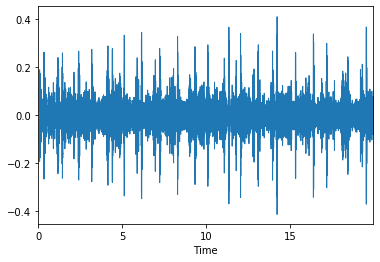

In [7]:
# trim silent edges and plot
track, _ = librosa.effects.trim(y)
librosa.display.waveplot(track, sr=sr);

### Mel Spectrogram

# EXPLAIN WHAT MFCC IS!!

Using [LibROSA Demo](https://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb) 
or 
[Read and Visualize Audio Files in Python](librosa module)(https://www.youtube.com/watch?v=vJ_WL9aYfNI)
Use them to deploy this part then put them below as resources

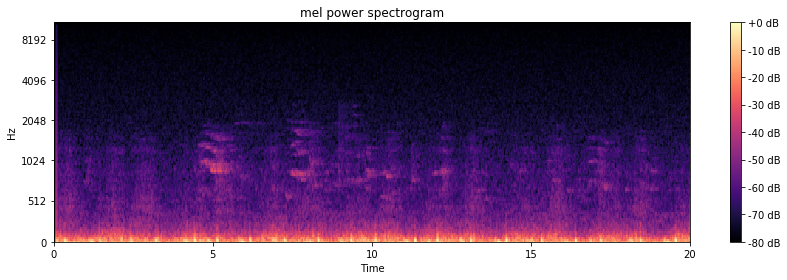

In [8]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [9]:
# Load various imports 
from datetime import datetime
from os import listdir
from os.path import isfile, join

import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

Using TensorFlow backend.


In [10]:
mypath = "../data/respiratory_sound_database/audio_and_txt_files"
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.wav'))] 

In [11]:
p_id_in_file = [] # patient IDs corresponding to each file
for name in filenames:
    p_id_in_file.append(int(name[:3]))

p_id_in_file = np.array(p_id_in_file) 

In [12]:
max_pad_len = 862 # to make the length of all MFCC equal

def extract_features(file_name):
    """
    This function takes in the path for an audio file as a string, loads it, and returns the MFCC
    of the audio"""
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=20) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

**WORK IN PROGRESS** 